**Importing libraries**


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Importing datasets**

In [2]:
df = pd.read_csv('HR_attrition_dataset.csv')

In [3]:
df.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


**Dimension of Dataset**

In [4]:
df.shape

(4410, 24)

The dataset consists of 4410 rows and 24 columns

**Datatypes & Columns having Null Values**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

* most of the data are numeric 
* contains  null values 

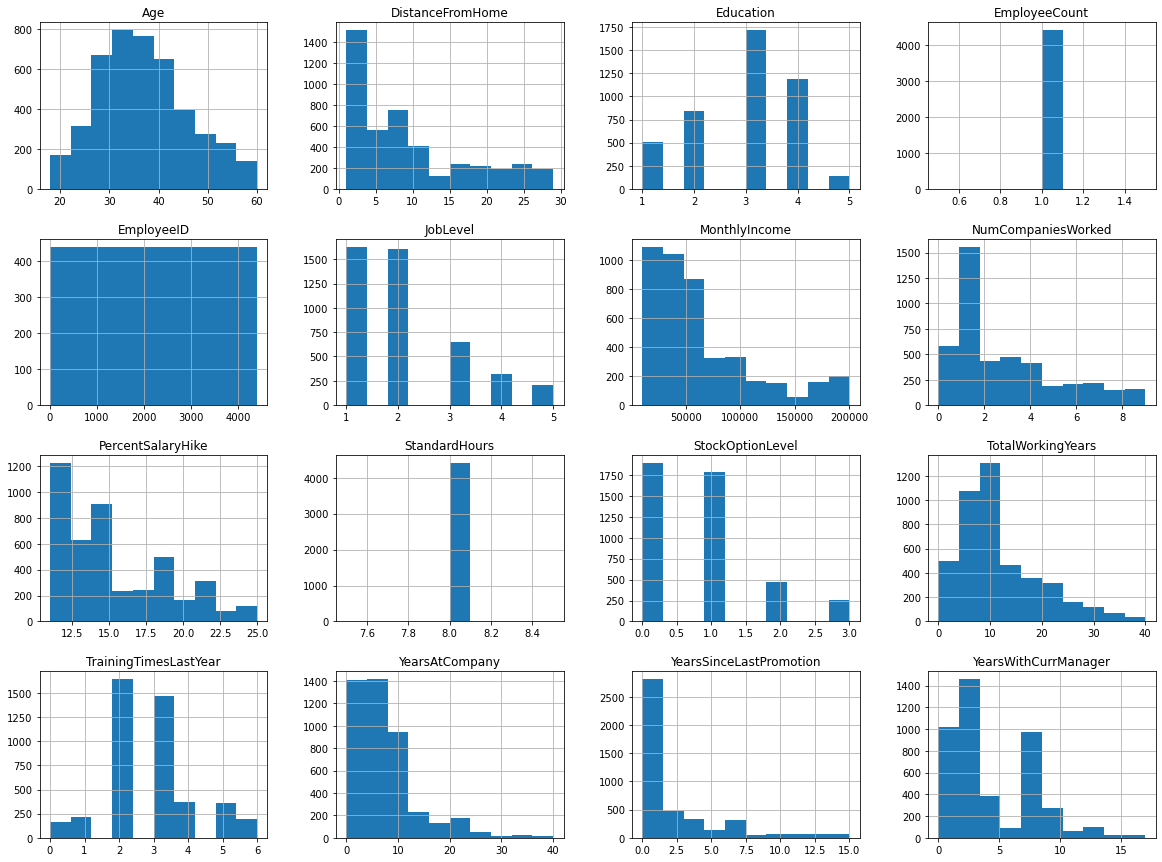

In [6]:
freqgraph = df.select_dtypes(include=['float64','int64'])
freqgraph.hist(figsize=(20,15))
plt.show()

# preprocessing

## Handling Missing Values

**finding columns which contains null values**

In [7]:

df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [8]:

df.isna().sum().sum()


28

* data NumCompaniesWorked & TotalWorkingYears have null values 
* total missing values 28


In [9]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [10]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

### Handling missing values by using Median


In [11]:
#Filling missing values by using Median
for i in['NumCompaniesWorked','TotalWorkingYears']:
    df[i] = df[i].fillna(df[i].median())


**check whether Null values clear or not**

In [12]:
df.isna().sum().to_frame('Count of Null values')

,Count of Null values
Age,0
Attrition,0
BusinessTravel,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeID,0
Gender,0


* Missing value filled 

## Outlier Detection

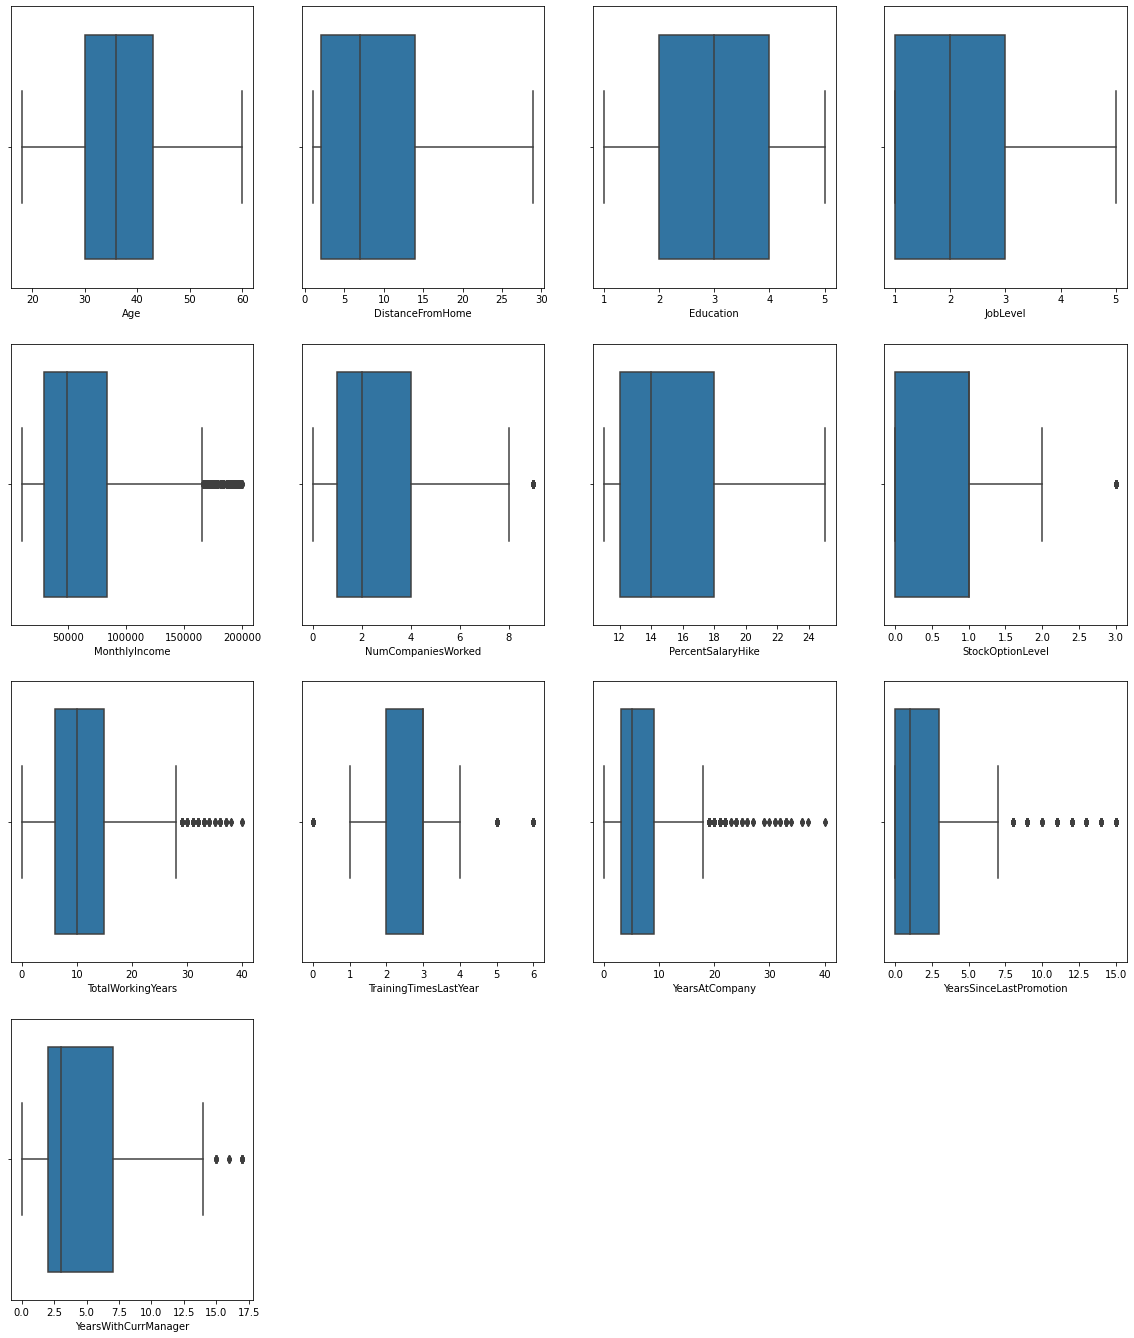

In [13]:
plt.figure(figsize=(20,30))
features = ['Age','DistanceFromHome','Education',
            'JobLevel','MonthlyIncome','NumCompaniesWorked',
            'PercentSalaryHike','StockOptionLevel','TotalWorkingYears',
            'TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion',
            'YearsWithCurrManager']
for i in enumerate(features): 
    ax = plt.subplot(5, 4, i[0]+1)
    sns.boxplot(df[i[1]])

**Remove Outliers by IQR based filtering** 

In [14]:
for i in ['MonthlyIncome','NumCompaniesWorked','StockOptionLevel','TotalWorkingYears',
                   'TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']:
    Q1=df[i].quantile(0.25)  
    Q3=df[i].quantile(0.75)    
    IQR=Q3-Q1
    low_limit=Q1-1.5*IQR
    up_limit=Q3+1.5*IQR    
    for j in df[i]:    
       if j > up_limit or j < low_limit:     
            df[i] = df[i].replace(j, np.median(df[i]))            
              

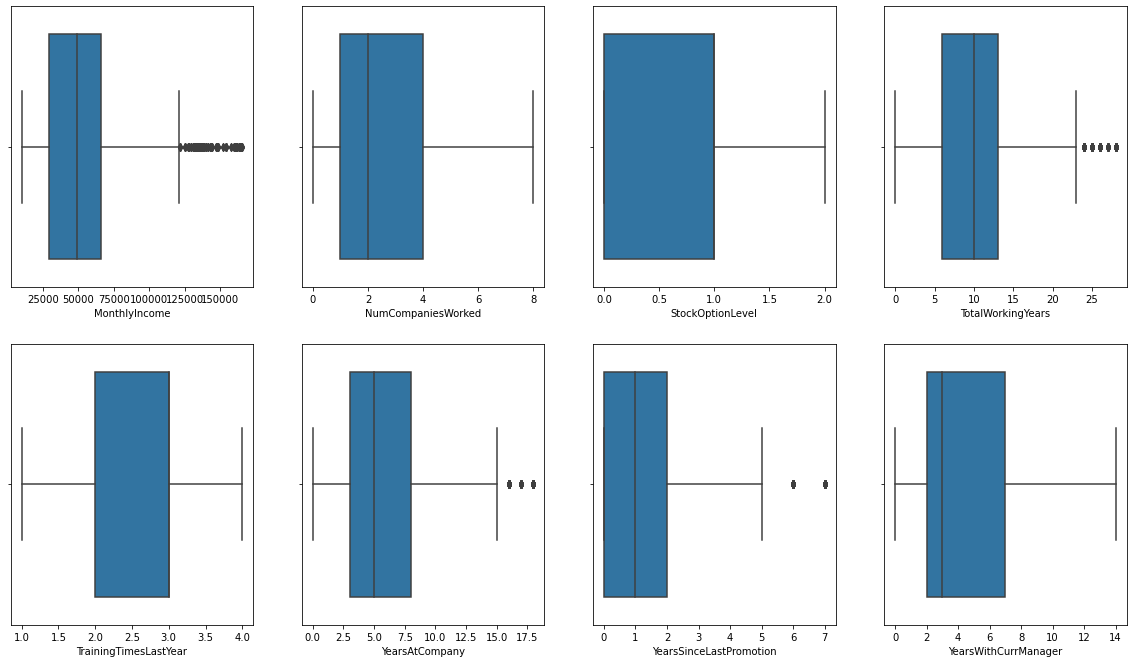

In [15]:
plt.figure(figsize=(20,30))
features = ['MonthlyIncome','NumCompaniesWorked','StockOptionLevel','TotalWorkingYears',
                   'TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']
for i in enumerate(features): 
    ax = plt.subplot(5, 4, i[0]+1)
    sns.boxplot(df[i[1]])

**splitting the data set**


In [16]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [17]:
df[['EmployeeCount', 'EmployeeID', 'Over18', 'StandardHours']]


,EmployeeCount,EmployeeID,Over18,StandardHours
0,1,1,Y,8
1,1,2,Y,8
2,1,3,Y,8
3,1,4,Y,8
4,1,5,Y,8
...,...,...,...,...
4405,1,4406,Y,8
4406,1,4407,Y,8
4407,1,4408,Y,8
4408,1,4409,Y,8


* Removing features which not relevant {'EmployeeCount', 'EmployeeID', 'Over18', 'StandardHours'}

In [18]:
df=df.drop(['EmployeeCount', 'EmployeeID', 'Over18', 'StandardHours'],axis=1)


In [19]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160.0,1.0,11,0,1.0,3,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890.0,0.0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,49190.0,1.0,15,1,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210.0,3.0,11,1,13.0,3,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420.0,4.0,12,2,9.0,2,6,0,4


In [20]:
y=pd.DataFrame(df['Attrition'])
x=pd.DataFrame(df.drop(['Attrition'], axis=1))


In [21]:
x.shape

(4410, 19)

In [22]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Attrition  4410 non-null   object
dtypes: object(1)
memory usage: 34.6+ KB


In [23]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   BusinessTravel           4410 non-null   object 
 2   Department               4410 non-null   object 
 3   DistanceFromHome         4410 non-null   int64  
 4   Education                4410 non-null   int64  
 5   EducationField           4410 non-null   object 
 6   Gender                   4410 non-null   object 
 7   JobLevel                 4410 non-null   int64  
 8   JobRole                  4410 non-null   object 
 9   MaritalStatus            4410 non-null   object 
 10  MonthlyIncome            4410 non-null   float64
 11  NumCompaniesWorked       4410 non-null   float64
 12  PercentSalaryHike        4410 non-null   int64  
 13  StockOptionLevel         4410 non-null   int64  
 14  TotalWorkingYears       

## Feature Encoding

**list of column names from feature data which are suitable for label encoding**


In [24]:
HR_Attri_Cols = []
for i in list(x.columns):
    if x[i].dtype == 'O' and len(x[i].unique()) > 1:
        HR_Attri_Cols.append(i)
      
print('list of columns needs a Label Encoding: ',HR_Attri_Cols)

list of columns needs a Label Encoding:  ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']


In [25]:
x['Department'].value_counts()

Research & Development    2883
Sales                     1338
Human Resources            189
Name: Department, dtype: int64

In [26]:
x['BusinessTravel'].value_counts()

Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: BusinessTravel, dtype: int64

In [27]:
x['EducationField'].value_counts()

Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: EducationField, dtype: int64

In [28]:
x['JobRole'].value_counts()

Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Director            240
Human Resources              156
Name: JobRole, dtype: int64

**Creating a label encoded dataframe of the targeted columns with the help of LabelEncoder**

In [29]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for i in HR_Attri_Cols:
    x[i] = labelencoder.fit_transform(x[i])

In [30]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['Attrition']
for k in np.arange(len(a)):
    y[a[k]]=label_en.fit_transform(y[a[k]])

In [31]:
x.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,2,2,6,2,1,0,1,0,1,131160.0,1.0,11,0,1.0,3,1,0,0
1,31,1,1,10,1,1,0,1,6,2,41890.0,0.0,23,1,6.0,3,5,1,4
2,32,1,1,17,4,4,1,4,7,1,49190.0,1.0,15,1,5.0,2,5,0,3
3,38,0,1,2,5,1,1,3,1,1,83210.0,3.0,11,1,13.0,3,8,7,5
4,32,2,1,10,1,3,1,1,7,2,23420.0,4.0,12,2,9.0,2,6,0,4


In [32]:
x.shape

(4410, 19)

## Feature Reduction

**Calculating the Correlation matrix using .corr()**


<AxesSubplot:title={'center':'Heatmap of the Encoded Dataframe'}>

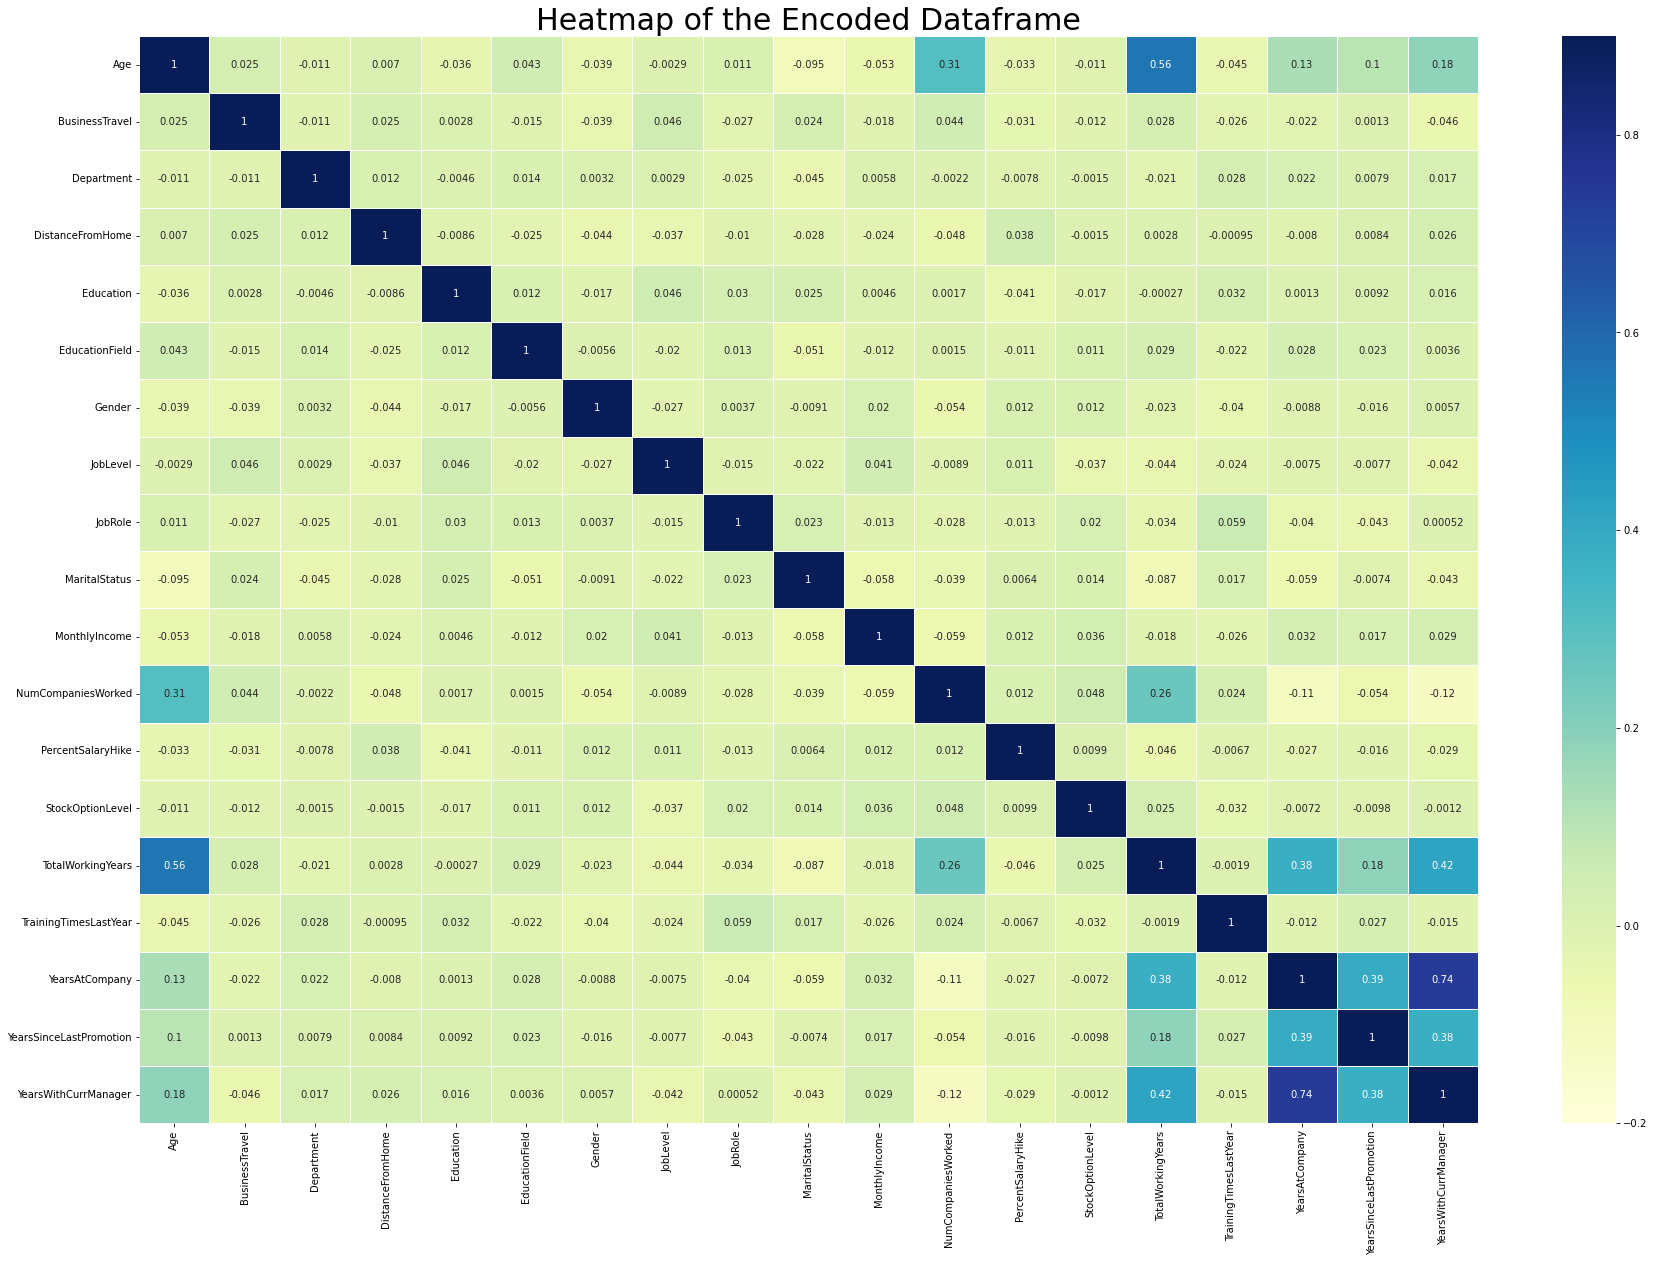

In [33]:
corrmatrix = x.corr()
plt.figure(figsize=(30,20))
plt.title('Heatmap of the Encoded Dataframe', fontsize=30)
sns.heatmap(corrmatrix,vmin=-.2,vmax=.9,annot=True,linewidth=0.75,cmap='YlGnBu')

**Removing features which have high Correlation**

In [34]:
x.drop(columns=[ 'YearsAtCompany'],inplace=True)
x.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<AxesSubplot:title={'center':'Heatmap of the Encoded Dataframe'}>

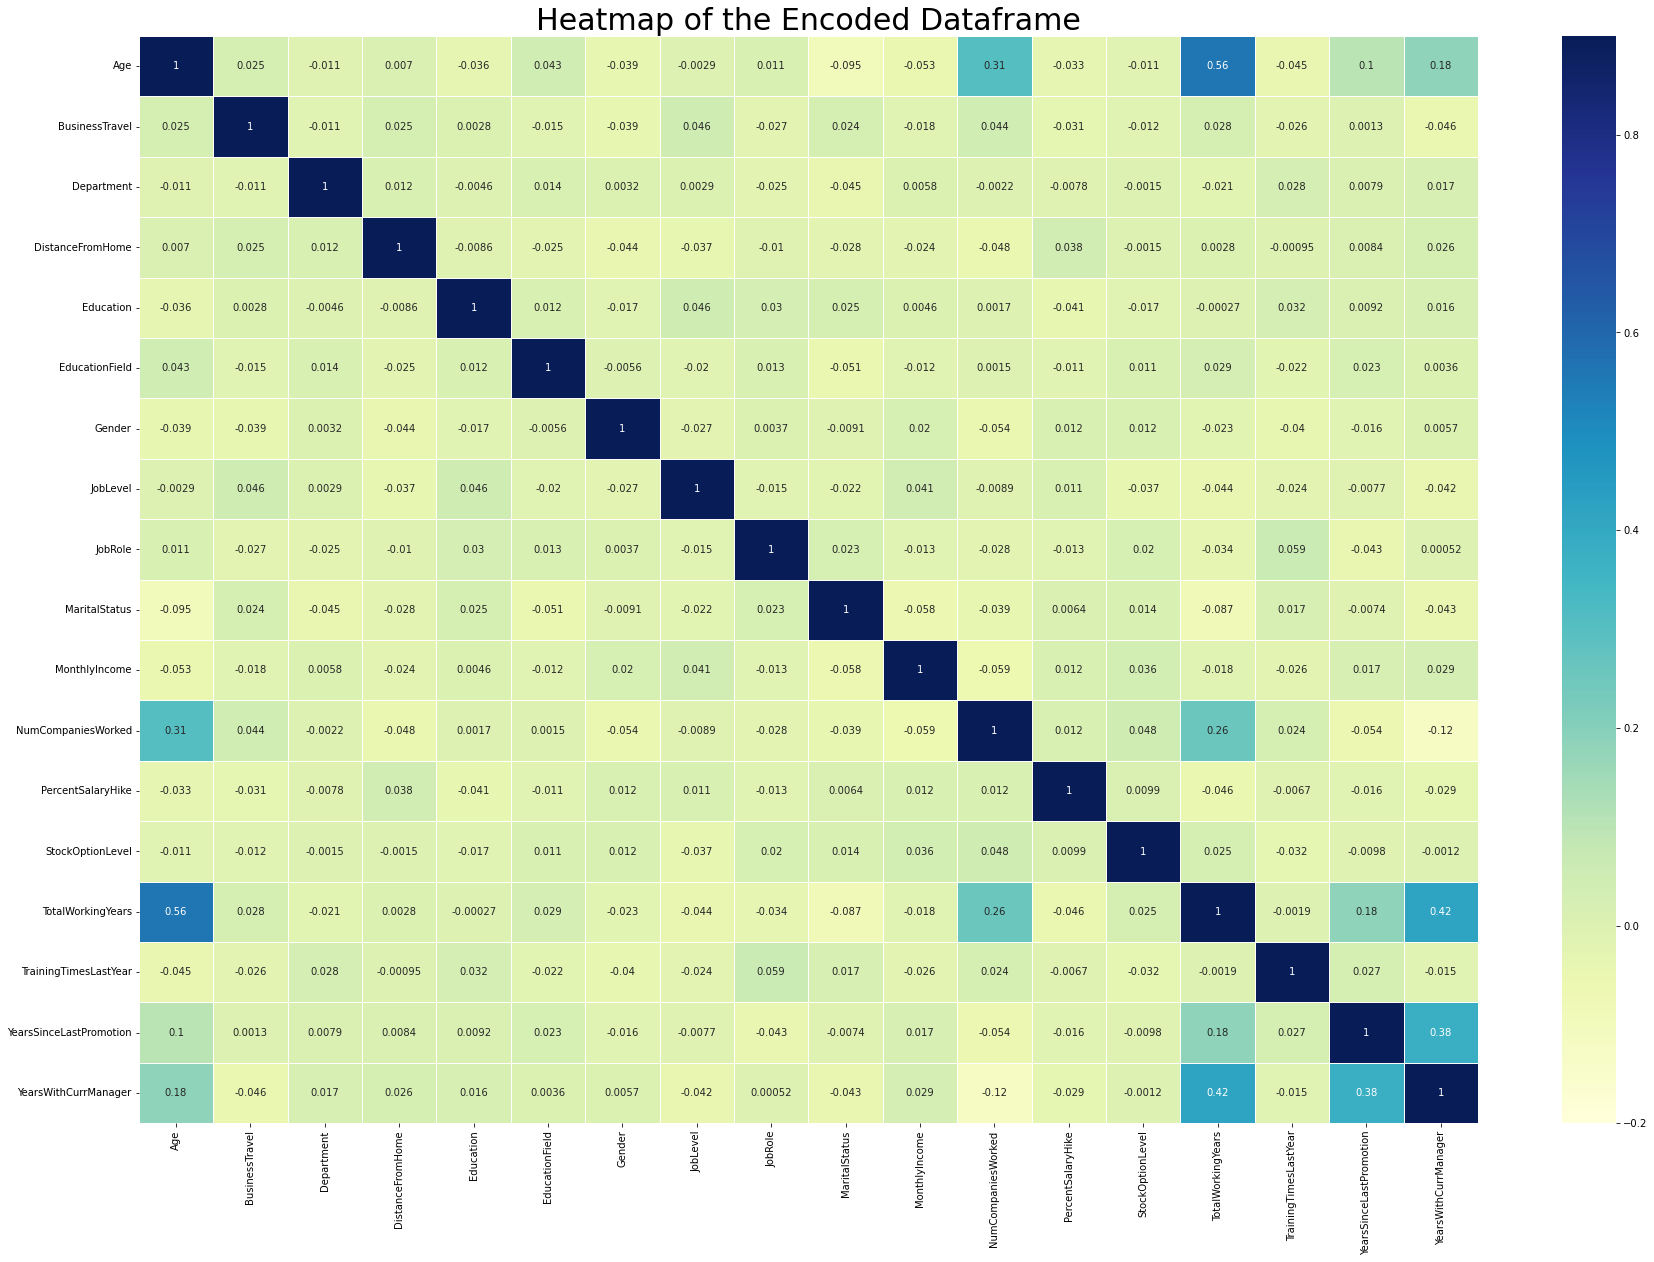

In [35]:
corrmatrix = x.corr()
plt.figure(figsize=(30,20))
plt.title('Heatmap of the Encoded Dataframe', fontsize=30)
sns.heatmap(corrmatrix,vmin=-.2,vmax=.9,annot=True,linewidth=0.75,cmap='YlGnBu')

## Feature Engineering


In [36]:
x.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [37]:
x['Education_']=x['Education']+x['EducationField']

In [38]:
x=x.drop([ 'Education','EducationField'],axis=1)

In [39]:
x['job']=x['JobLevel']+x['JobRole']

In [40]:
x=x.drop([ 'JobLevel','JobRole'],axis=1)

In [41]:
x.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Gender',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Education_', 'job'],
      dtype='object')

In [42]:
#splitting the data

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2,test_size=0.2)

In [44]:
x_train.shape

(3528, 16)

In [45]:
y_train.shape

(3528, 1)

In [46]:
x_test.shape

(882, 16)

In [47]:
y_test.shape

(882, 1)

In [48]:
### logistic regression

In [49]:
from sklearn.linear_model import LogisticRegression
logis_model = LogisticRegression()
logis_model.fit(x_train,y_train)
y_pred =logis_model.predict(x_test)

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score

In [51]:
print("accuracy score is",accuracy_score(y_test,y_pred))
print("precision_score",precision_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))


accuracy score is 0.8378684807256236
precision_score 0.0
recall_score 0.0
f1_score 0.0


In [52]:
confusion_matrix(y_test,y_pred)

array([[739,   0],
       [143,   0]], dtype=int64)

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)




In [58]:
from sklearn.linear_model import LogisticRegression
logis_model = LogisticRegression()
logis_model.fit(x_train,y_train)
y_pred =logis_model.predict(x_test)

In [59]:
print("accuracy score is",accuracy_score(y_test,y_pred))
print("precision_score",precision_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))


accuracy score is 0.8333333333333334
precision_score 0.3
recall_score 0.02097902097902098
f1_score 0.0392156862745098


In [60]:
confusion_matrix(y_test,y_pred)

array([[732,   7],
       [140,   3]], dtype=int64)

 ### RandomForestClassifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score

In [63]:
print("accuracy score is",accuracy_score(y_test,y_pred))
print("precision_score",precision_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))


accuracy score is 0.9897959183673469
precision_score 0.9926470588235294
recall_score 0.9440559440559441
f1_score 0.967741935483871


In [64]:
confusion_matrix(y_test,y_pred)

array([[738,   1],
       [  8, 135]], dtype=int64)

In [65]:
pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100

MonthlyIncome              12.377337
Age                        12.223493
TotalWorkingYears          10.260121
DistanceFromHome            8.170172
PercentSalaryHike           7.815303
job                         6.933447
YearsWithCurrManager        6.776055
NumCompaniesWorked          6.220024
Education_                  6.082608
YearsSinceLastPromotion     4.485900
MaritalStatus               4.003174
TrainingTimesLastYear       3.345198
Department                  3.184488
BusinessTravel              3.182609
StockOptionLevel            3.157993
Gender                      1.782081
dtype: float64

In [66]:
#distribution of predictions probability 

In [77]:
threshold=0.30
y_pred_prob=rf.predict_proba(x_test)[:,1]
y_pred=(y_pred_prob>threshold).astype(int)

In [78]:
print("accuracy score is",accuracy_score(y_test,y_pred))
print("precision_score",precision_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))

accuracy score is 0.9829931972789115
precision_score 0.9210526315789473
recall_score 0.9790209790209791
f1_score 0.9491525423728813


In [79]:
rf.fit(x_train,y_train)

RandomForestClassifier()